# Data Analysis notebook (2) only for external_data.csv  (the weather set) 

### Summary:
- 1) A first look at our dataset with ydata-profile (only a quick summary of the dataset)
- 2) Visualization of our dataset (Discovery of our dataset...)
- 3) How to handle missing values ? (Replace them, Delete the null columns, Cleaning the dataset)
- 4) Deal with highly correlated variables (correlation matrix, PCA)

-----------------------------------------------------------------------------------------------

We begin by importing the necessary packages

In [2]:
import numpy as np
import pandas as pd
import ydata_profiling
import folium
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from pandas_profiling import ProfileReport


/var/folders/m1/k7ywl20s5t90qkylbxspkw080000gn/T/ipykernel_35102/1034897831.py:10: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


-----------------------------------------------------------------------------------------------
#### 1) A first look at our dataset with ydata-profile

In [3]:
#Load the external  dataset
data_external = pd.read_csv("data/external_data.csv")

The below report sums up key elements we need to know for external data

In [4]:
# Generate a minimal profile report
profile = ProfileReport(data_external, minimal=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

-----------------------------------------------------------------------------------------------
#### 2) Visualization of our dataset (Discovery of our dataset...)

In [5]:
data_external.head()

,numer_sta,date,pmer,tend,cod_tend,dd,ff,t,td,u,...,hnuage1,nnuage2,ctype2,hnuage2,nnuage3,ctype3,hnuage3,nnuage4,ctype4,hnuage4
0,7149,2021-01-01 00:00:00,100810,80,1,270,1.8,272.75,272.15,96,...,600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7149,2021-01-01 03:00:00,100920,110,3,300,1.7,271.25,270.95,98,...,1500.0,2.0,3.0,3000.0,NaN,NaN,NaN,NaN,NaN,NaN
2,7149,2021-01-01 06:00:00,100950,30,3,290,2.6,271.95,271.65,98,...,480.0,4.0,6.0,2000.0,6.0,3.0,3000.0,NaN,NaN,NaN
3,7149,2021-01-01 09:00:00,101100,150,2,280,1.7,272.45,272.05,97,...,1740.0,3.0,3.0,2800.0,NaN,NaN,NaN,NaN,NaN,NaN
4,7149,2021-01-01 12:00:00,101110,30,0,50,1.0,276.95,274.15,82,...,330.0,4.0,6.0,570.0,7.0,6.0,810.0,NaN,NaN,NaN


In [6]:
data_external.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 59 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   numer_sta  3322 non-null   int64  
 1   date       3322 non-null   object 
 2   pmer       3322 non-null   int64  
 3   tend       3322 non-null   int64  
 4   cod_tend   3322 non-null   int64  
 5   dd         3322 non-null   int64  
 6   ff         3322 non-null   float64
 7   t          3322 non-null   float64
 8   td         3322 non-null   float64
 9   u          3322 non-null   int64  
 10  vv         3322 non-null   int64  
 11  ww         3322 non-null   int64  
 12  w1         3315 non-null   float64
 13  w2         3312 non-null   float64
 14  n          3166 non-null   float64
 15  nbas       3317 non-null   float64
 16  hbas       2869 non-null   float64
 17  cl         2909 non-null   float64
 18  cm         1941 non-null   float64
 19  ch         1678 non-null   float64
 20  pres    

We see a lot of missing values...

In [7]:
# Calculate the percentage of missing values in each column
missing_values_percentage = (data_external.isnull().sum() / len(data_external)) * 100

# Filter to show only columns with missing values
missing_values_percentage = missing_values_percentage[missing_values_percentage > 0]

# Display the missing values as a percentage in a formatted table
print(missing_values_percentage.to_frame('Percentage of Missing Values'))


           Percentage of Missing Values
w1                             0.210716
w2                             0.301023
n                              4.695966
nbas                           0.150512
hbas                          13.636364
cl                            12.432270
cm                            41.571343
ch                            49.488260
niv_bar                      100.000000
geop                         100.000000
tend24                         0.301023
tn12                          75.015051
tn24                         100.000000
tx12                          75.015051
tx24                         100.000000
tminsol                       99.969898
sw                           100.000000
tw                           100.000000
raf10                          0.301023
etat_sol                       1.565322
ht_neige                       1.475015
ssfrai                        13.395545
perssfrai                     13.395545
rr1                            0.270921


What should we do with these missing values ? Replace them by their mean ? Delete them ?

Do some variables have repetitions ? How about the uniqueness ?

In [8]:
data_external.nunique(axis=0)

numer_sta       1
date         3321
pmer          465
tend           99
cod_tend        9
dd             37
ff            109
t             345
td            281
u              77
vv           1230
ww             42
w1              9
w2              9
n              10
nbas           10
hbas           97
cl             11
cm              9
ch             10
pres          459
niv_bar         0
geop            0
tend24        353
tn12          217
tn24            0
tx12          279
tx24            0
tminsol         1
sw              0
tw              0
raf10         170
rafper        186
per             1
etat_sol        9
ht_neige        7
ssfrai          3
perssfrai       2
rr1            33
rr3            64
rr6            91
rr12          124
rr24          164
phenspe1        0
phenspe2        0
phenspe3        0
phenspe4        0
nnuage1         9
ctype1          9
hnuage1       279
nnuage2         8
ctype2          8
hnuage2       244
nnuage3         8
ctype3          8
hnuage3   

-----------------------------------------------------------------------------------------------
#### 4) Deal with highly correlated variables (correlation matrix, PCA)

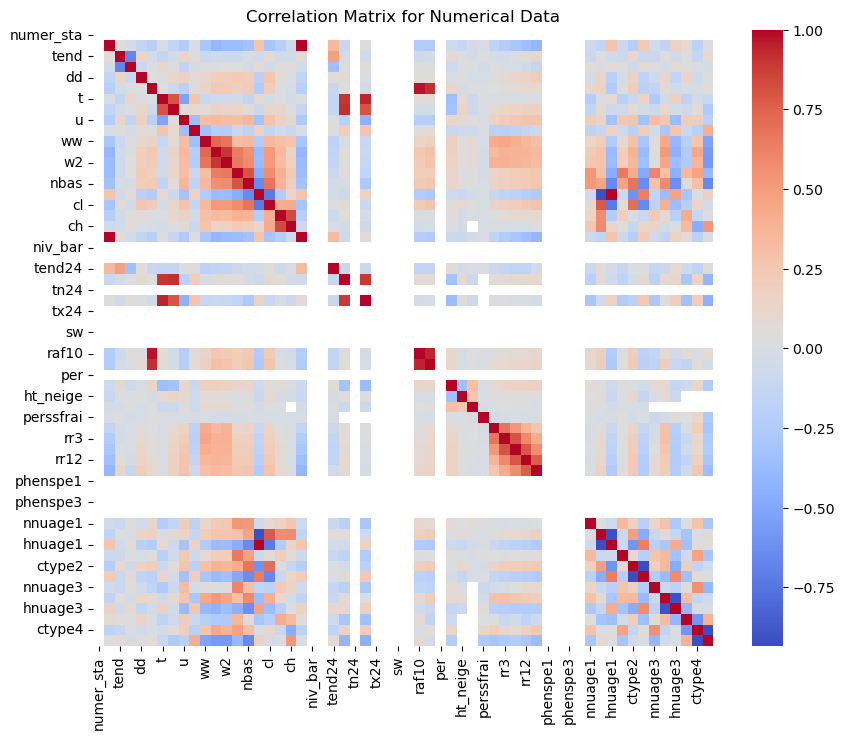

In [9]:
# Select only columns with numerical data types
numerical_data = data_external.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix for numerical data
corr_matrix_numerical = numerical_data.corr()

# Plot the heatmap for the correlation matrix of numerical data
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_numerical, cmap='coolwarm')
plt.title('Correlation Matrix for Numerical Data')
plt.show()


The heatmap you the correlation coefficients between various numerical variables in our weather dataset. In the heatmap, we can observe that some variables indeed have strong correlations with others, as indicated by the darker shades of red (positive correlation) and blue (negative correlation). This suggests that these variables share a substantial amount of information.

When variables are highly correlated, it can be beneficial to apply Principal Component Analysis (PCA) to reduce the dimensionality of the dataset. PCA can help in identifying a smaller number of uncorrelated variables, known as principal components, which can explain most of the variability in the data. This reduction in dimensionality can simplify further analysis, improve the efficiency of algorithms, and help mitigate issues such as multicollinearity.

The presence of completely white lines in the heatmap indicates variables that have no variation (constant values) or are entirely composed of missing values. Such variables will be removed without loss of information.

> Cleaning and standardizing the data before applying the PCA

In [10]:
# First, remove columns with no variance or all missing values
numerical_data = data_external.select_dtypes(include=[np.number])
clean_numerical_data = numerical_data.loc[:, (numerical_data.nunique() != 1)]

# Check and ensure there are no columns with all NaN values after the above operation
clean_numerical_data = clean_numerical_data.dropna(axis=1, how='all')

# Impute missing values with the mean of each column
# Note: This assumes that the columns with NaNs are not categorical and the mean is a reasonable estimate for the missing values.
clean_numerical_data_imputed = clean_numerical_data.fillna(clean_numerical_data.mean())

# Ensure there are no NaN values after imputation (this should not print anything if the imputation was successful)
assert not clean_numerical_data_imputed.isnull().values.any(), "There are still NaNs present after imputation."

# Standardizing the data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(clean_numerical_data_imputed)

> Reduction of the dimentionnality with the PCA

To create a scree plot and determine the number of principal components to keep, we need to perform PCA without specifying the number of components, so that we can evaluate the variance explained by each component. Then, we can plot the cumulative variance explained by the components and look for the point where additional components do not significantly increase the explained variance, which is often referred to as the "elbow" of the plot.

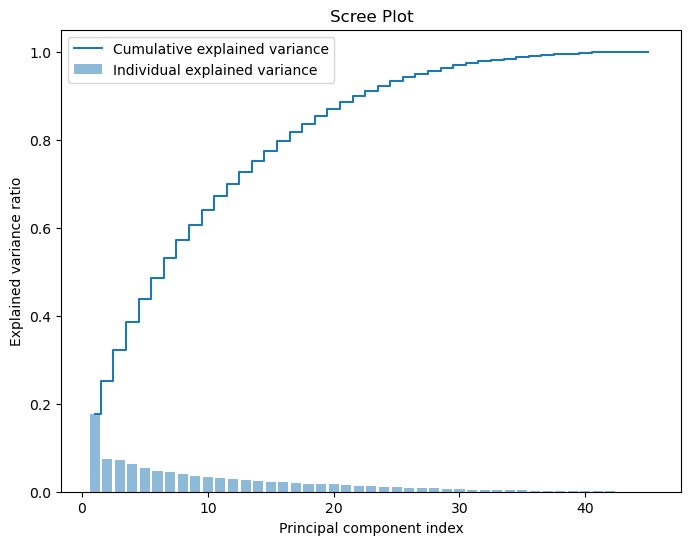

In [11]:
# Applying PCA without specifying the number of components
pca = PCA()
principal_components = pca.fit_transform(data_standardized)

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the cumulative variance explained
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plotting the scree plot
plt.figure(figsize=(8,6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.title('Scree Plot')
plt.show()

# Identifying the 'elbow' in the scree plot can help decide how many principal components to keep.
# This is done by looking for the point where the increase in the explained variance ratio begins to slow down significantly.


Based on the scree plot , the number of principal components to keep can be determined by looking for the point at which the cumulative explained variance curve starts to plateau, indicating that each additional component contributes less to the explanation of variance within the data. This is often referred to as the "elbow" of the curve.

In our plot, the elbow appears to be somewhere between the 5th and 10th components. We might consider keeping around 5 to 10 components, as beyond this point, the increase in cumulative variance slows down significantly. 

In [17]:
# Number of components to keep
n_components_to_keep = 7 # the number we decided based on the scree plot

# Fit PCA with the decided number of components
pca = PCA(n_components=n_components_to_keep)
pca.fit(data_standardized)

# Calculate the loadings (correlations) for each component
loadings = pd.DataFrame(pca.components_, columns=clean_numerical_data_imputed.columns)

# Identify variables with the strongest contributions (highest loadings) for the components
# Here we choose a threshold for considering a loading as significant, for example 0.5.
significant_loadings_indices = np.abs(loadings) > 0.1

# Print the variables that have significant loadings for each component
for i in range(n_components_to_keep):
    significant_vars = loadings.columns[significant_loadings_indices.iloc[i]]
    print(f"Principal Component {i+1} significant variables:")
    print(significant_vars.tolist())



Principal Component 1 significant variables:
['pmer', 'ff', 'u', 'ww', 'w1', 'w2', 'n', 'nbas', 'hbas', 'cl', 'pres', 'raf10', 'rafper', 'rr1', 'rr3', 'rr6', 'rr12', 'rr24', 'ctype1', 'hnuage1', 'ctype2', 'hnuage2']
Principal Component 2 significant variables:
['pmer', 'tend', 'cod_tend', 'ff', 't', 'td', 'u', 'vv', 'pres', 'tend24', 'tn12', 'tx12', 'raf10', 'rafper', 'etat_sol', 'nnuage1', 'nnuage2']
Principal Component 3 significant variables:
['ff', 'td', 'u', 'ww', 'nbas', 'hbas', 'cl', 'cm', 'ch', 'raf10', 'rafper', 'rr1', 'rr3', 'rr6', 'rr12', 'rr24', 'ctype1', 'hnuage1', 'ctype3', 'hnuage3']
Principal Component 4 significant variables:
['tend', 'cod_tend', 'dd', 'ff', 't', 'td', 'u', 'hbas', 'cl', 'cm', 'ch', 'tend24', 'tn12', 'tx12', 'raf10', 'rafper', 'etat_sol', 'ctype1', 'hnuage1']
Principal Component 5 significant variables:
['tend', 'cod_tend', 'dd', 'ff', 'w2', 'n', 'hbas', 'cm', 'ch', 'tend24', 'raf10', 'rafper', 'rr12', 'rr24', 'nnuage1', 'hnuage1', 'nnuage2', 'ctype2',

The threshold for significance has been set at 0.1, which is relatively low, indicating a more inclusive approach to determining significance. This approach identifies a broader set of variables that have at least some level of contribution to each principal component.

Here's the interpretation of the results:

- **Principal Component 1**: This component has a high loading for a variety of variables, including pressure ('pmer'), wind speed ('ff'), humidity ('u'), weather conditions ('ww'), and cloud cover variables. These variables are the most influential in terms of the variance captured by this component.

- **Principal Component 2**: Shows significant contributions from variables related to temperature ('t', 'td'), pressure tendencies ('tend', 'cod_tend'), and others. This suggests that changes in temperature and pressure over time play a significant role in this component.

- **Principal Component 3**: Again, wind speed ('ff'), humidity ('u'), and precipitation variables ('rr1', 'rr3', 'rr12', 'rr24') are significant, along with weather condition and cloud cover variables. This component seems to capture aspects of weather that are dynamic and change over short periods.

- **Principal Component 4**: Includes a mix of temperature ('t'), wind ('ff'), and pressure variables, much like PC2, but with a different combination, potentially capturing different aspects of weather patterns.

- **Principal Component 5**: This component is influenced by a broad set of variables, suggesting it captures a more complex set of weather phenomena, possibly representing more transient or less common conditions.

- **Principal Component 6**: Is notably influenced by cloud type and height variables ('ctype4', 'hnuage4', etc.), which could be capturing variance related to cloud formations and their impact on weather conditions.

- **Principal Component 7**: Highlights temperature ('t'), pressure ('pmer'), and a range of other variables, suggesting a component related to daily temperature variation and associated weather conditions.

Each principal component represents a different 'direction' in our data in which there is significant variance. The variables with significant loadings for each component are those that contribute most to the variance in that direction. These variables are not necessarily to be removed; instead, they are the key contributors to the patterns identified by each principal component. When interpreting PCA, it's important to remember that the goal is not necessarily to discard variables, but to understand the underlying structure of the data. If we intend to reduce the number of variables for further analysis, you would typically consider variables with low loadings across most components, consulting domain knowledge to ensure that important information is not lost.

In [18]:
# Create a DataFrame with these 7 principal components
pca_df = pd.DataFrame(principal_components, columns=[f'Principal Component {i+1}' for i in range(n_components_to_keep)])

# Display the first few rows of the transformed dataset
print(pca_df.head())


   Principal Component 1  Principal Component 2  Principal Component 3  \
0              -0.883478               2.653868               0.834063   
1              -0.795300               2.724191               1.013409   
2               0.923415               5.820185              -1.069572   
3               0.378477               4.671949               0.681171   
4               1.581626               3.917668               0.262071   

   Principal Component 4  Principal Component 5  Principal Component 6  \
0               1.081418              -1.397359              -0.325307   
1               1.408928              -0.776291              -0.277123   
2               0.504872               0.341428               0.081181   
3               0.131128              -0.482439              -0.516008   
4               0.183440              -1.269058              -0.033586   

   Principal Component 7  
0               0.826857  
1               1.927802  
2               1.565090  
3 

Resulting DataFrame: pca_df is the new DataFrame containing the principal components. This DataFrame can be used in further analyses or as input to predictive models.
The principal components in pca_df represent the directions in the data that maximize variance. Each principal component is a linear combination of the original variables, and together, the components provide a compressed representation of the data.
When building our models, we will see that PCA theory has not made our predictions more accurate so we will leave it there.